In [ ]:
!pip install matplotlib

# Detecting outliers using the Inter Quantile Range(IQR)

# Coding

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("dataset/ford.csv")

In [ ]:
np.max(df.price)

54995

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


Text(0.5, 0, 'data')

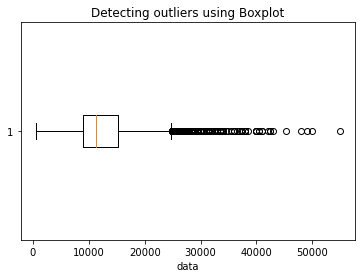

In [ ]:
from matplotlib import pyplot as plt
plt.boxplot(df.price, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('data')

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for ii in data: 
        if (ii<lwr_bound or ii>upr_bound):
            outliers.append(ii)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df.price)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [24799, 24799, 24800, 24850, 24850, 24900, 24950, 24979, 24979, 24989, 24990, 24990, 24990, 24990, 24990, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24999, 24999, 24999, 24999, 24999, 24999, 24999, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25050, 25250, 25399, 25400, 25400, 25470, 25490, 25495, 25495, 25495, 25498, 25498, 25499, 25499, 25500, 25500, 25500, 25500, 25500, 25500, 25500, 25500, 25500, 25500, 25520, 25695, 25700, 25795, 25799, 25799, 25820, 25890, 25925, 25925, 25950, 25950, 25990, 25990, 25990, 25990, 25991, 25995, 25995, 25995, 25995, 25995, 25998, 25999, 25999, 25999, 26000, 26000, 26000, 26000, 26000, 26000, 26000, 26030, 26200, 26230, 26250, 26290, 26299, 26360, 26430, 26475, 26490, 26490, 26495, 26499, 26500, 26500, 26500, 26500, 26698, 26723, 26780, 26900, 26900, 26922, 26950, 26950, 26995, 26995, 27000, 27000, 27000, 27000, 27200, 27300, 27400, 27480, 27490, 27497, 27499, 27500, 27500, 27500,

In [ ]:

len(sample_outliers)

286

# Handling Outliers

Mean/Median imputation

In [ ]:
median = np.median(df.price)# Replace with median
for i in sample_outliers:
    c = np.where(df.price==i, median, df.price)
#print("Sample: ", df.price)
print("New array: ",c)
print(len(c))

New array:  [12000. 14000. 13000. ...  7499.  9999.  8299.]
17965


12279.756415251879

Text(0.5, 0, 'Sample')

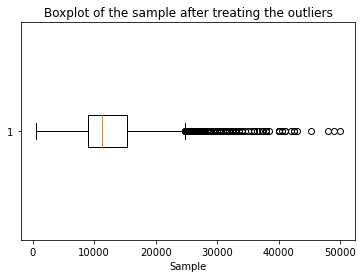

In [ ]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")